# Cryptocurrency Attention-Momentum Strategy 

Based on Yang (2019), Liu (2021), Liu (2022)

Effectively a combination of:

- Price Momentum:
    > Support by all studies </br>
    > Support on all shorter time-frames, notably between 1 to 4 weeks estimation window and weekly rebalancing </br>
    > Also support on shorter timeframes and more frequent rebalancing, but we avoid that for practical reasons 

- Size
    > Usually smaller cryptos are said to have a premium (justified by their illiquidity) </br>
    > That makes the size premium not very interesting to trade </br>
    > But Liu (2021 & 2022) finds that momentum is stronger in bigger and more well-known stocks </br>
    > We will focus on bigger cryptocurrencies for liquidity  

- Investor Attention
    > As proxied by Google Searches </br>
    > Standardized value </br>
    > Could be divided in two, positive attention and negative attention 

***
## Setup

In [57]:
# Importing relevant Package
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import os 
# from eod import EodHistoricalData

import matplotlib.pyplot as plt
from IPython.display import Image

In [58]:
# Loading Price and Market Cap data from CoinMetrics
price_df = pd.read_csv('../data/cryptorets.csv')
cap_df = pd.read_csv('../data/cryptocap.csv')

In [59]:
###=== Cleaning the Columns Titles ===###

split_letter = ' /'

# Modify the column names using a list comprehension
new_columns_price = [name.split(split_letter)[0] for name in price_df.columns]
new_columns_cap = [name.split(split_letter)[0] for name in cap_df.columns]

# Rename the columns in the DataFrame
price_df.columns = new_columns_price
cap_df.columns = new_columns_cap

In [60]:
###=== Setting DATE index ===###

price_df['DATE'] = pd.to_datetime(price_df['Time'])
price_df = price_df.set_index(price_df['DATE']).drop(columns={'DATE'})

cap_df['DATE'] = pd.to_datetime(cap_df['Time'])
cap_df = cap_df.set_index(cap_df['DATE']).drop(columns={'DATE'})

In [61]:
# Had to remove EOS because Market Cap Values Missing 
price_df = price_df.drop(columns={'EOS'})

In [62]:
# Checkup to see if our lists work 
not_in_list1 = [x for x in price_df.columns if x not in cap_df.columns ]
not_in_list2 = [x for x in cap_df.columns if x not in price_df.columns]

print("Values not in list1:", not_in_list1)
print("Values not in list2:", not_in_list2)

Values not in list1: []
Values not in list2: []


In [63]:
# Refine our list of cryptocurrencies 
our_list = ['1INCH', 'AAVE', 'ADA', 'ALGO', 'ALPHA', 'ANT', 'BAL', 'BAT', 'BCH',
       'BNB', 'BSV', 'BTC', 'BTG', 'COMP', 'CRO', 'CRV', 'CVC',
       'DASH', 'DCR', 'DGB', 'DOGE', 'DOT', 'DRGN', 'ELF',
       'ETC', 'ETH', 'FTT', 'FUN', 'GAS', 'GNO', 'GRIN',
       'HEDG', 'HT', 'ICP', 'KNC',
       'LINK', 'LOOM', 'LPT', 'LTC', 'MAID', 'MANA', 'MKR', 'NEO',
       'NXM', 'OMG', 'PAX', 'PAXG', 'PERP', 'POLY', 'POWR', 'PPT',
       'QASH', 'QNT', 'REN', 'REP', 'SAI', 'SNT', 'SNX',
       'SRM', 'SUSHI', 'SWRV', 'TRX', 'UMA', 'UNI', 'VTC', 'WTC', 'XEM', 'XLM',
       'XMR', 'XRP', 'XTZ', 'XVG', 'YFI', 'ZEC', 'ZRX']

In [64]:
###=== Removing all stablecoins, doubles, etc ===###
price_df = price_df[our_list]

cap_df = cap_df[our_list]

In [65]:
###=== Starting the analysis at the point where there is >= 5 cryptos available ===###
restricted_date_ret_df = price_df[price_df.index > (price_df.notna().sum(axis=1) >= 6).idxmax()]
restricted_date_ret_df.iloc[0, :].dropna()


BTC     493.933492
DASH      7.958692
DOGE      0.000460
LTC      10.740582
VTC       0.988080
XMR       1.619399
Name: 2014-05-21 00:00:00, dtype: float64

In [66]:
###=== Starting the analysis at the point where there is 5 cryptos available ===###
restricted_date_cap_df = cap_df[cap_df.index > (cap_df.notna().sum(axis=1) >= 6).idxmax()]
restricted_date_cap_df.iloc[0, :].dropna()

BTC     6.322109e+09
DASH    3.433006e+07
DOGE    3.620412e+07
LTC     3.068128e+08
VTC     4.487514e+06
XMR     1.397249e+06
Name: 2014-05-21 00:00:00, dtype: float64

In [67]:
# Final dimension check 
print(restricted_date_ret_df.shape)
print(restricted_date_cap_df.shape)

(3245, 75)
(3245, 75)


***
## Cryptocurrency Attention



Very rough analysis using Google Search data (as in the paper). Unfortunately we weren't able to replicate the results obtained by Liu (2022) which suggest that Investor Attention could supplement the momentum strategy.However, we found seemingly contradictory remarks which could explain this problem.

Section 2.3.4 from Liu (2021) p.2712:

- Studying the cross section of time-series momentum for high and low attention coin 
- Google Attention Data for 10 Largest Coin for 2014 to 2018
- Two groups: High-attention coin and a group of low-attention coin. Test of the momentum strategy in each subgroup

Conclusion:
- Time-Series momentum effect is stronger for the relatively low-attention coins 
- Magnitudes of the coefficient much larger for the low-attention subgroup



Section B.2 from Liu (2022) p.1160:

Testing the hypothesis that the overreaction-driven is stronger among high-attention cryptocurrencies. 

Proxied by:
- Volume based measure investor attention (Hou, 2009)
- Google Searches of individual coins as an alternative proxy for investor attention (Liu 2021)

Volume-based:
- Momentum effect is more pronounced among coins with high attention as proxied by trading volume 
- But this is probably very correlated with the size component 
- Monotonically increasing across quintile portfolios for the high-volume subgroup 
- Echo that price momentum effect is more pronounced among stocks with high attention as proxied by stock trading volume 

Google searches based: 
- Direct proxy for investor attention 
- Sorting individual coins based on Google searches this week
- Below and above their median value (based on what estimation window?)
- Momentum effect is more pronounced among coins with high attention as proxied by Google Searches 
- For the low-search group, LS strategy is statistically insignificant
- Excess returns are monotonically increasing across the quintile portfolio for high-search subgroups 

Whole Market:
- Google Searches to capture aggregate investor attention proxied by the word "blockchain"
- "The coefficient estimate on Google is positive and statistically significant at the 1% level, suggesting that the momentum effect is larger at times of high investor attention as measured by Google searches."
- Remain highly significant with the controls 
- Average momentum factor returns of the top tercile (high attention) is about 4% higher than the average momentum factor returns

In [68]:
# Handpicked attention data for 2018-2023 
# We are still unable to use gtrendsR for this due to change in Google API 
attention_df = pd.read_csv('../data/googleTable_w_crypto.csv', parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])

In [69]:
# We replace the akward values 
attention_df = attention_df.replace("<1", 0)
attention_df = attention_df.astype(int)
attention_df.columns = our_list
attention_df.index = pd.to_datetime(attention_df.index)

# attention_df = attention_df[attention_df.columns[(attention_df == 0).sum() <= len(attention_df)*0.30]]

Upon further review, it seems as if there is a large difference implied between the different attention measures 

In [70]:
# Week over week change in attention
mom_attention = attention_df.pct_change().iloc[1:, :]
mom_attention = mom_attention.fillna(0)
mom_attention = mom_attention.replace([np.inf], 1)

In [224]:
attention_df.shape

(483, 75)

In [194]:
# Rolling increase in attention 
rolling_attention = attention_df / attention_df.rolling('28D').median()
rolling_attention = rolling_attention.fillna(0)
rolling_attention = rolling_attention.replace([np.inf], 1).iloc[3:]

In [197]:
rolling_attention = rolling_attention[rolling_attention.index >= '2014-05-21']

***
## Strategy

In [228]:
# Log Returns dataframe 
log_ret_df = np.log(1 + restricted_date_ret_df.pct_change())

In [204]:
def compute_mom_returns(returns_df, cap_df, n_universe,  n_stocks, estimation_window, holding_period, long_short=None, attention=None, random_start_date=False, random_slice=False, going_neutral=False, miss_allocation=False):
    """Compute momentum-based returns and portfolio weights.

    Parameters:
        MAIN STRATEGY PARAMETERS:
        returns_df (DataFrame): Dataframe containing the returns data.
        cap_df (DataFrame): Dataframe containing the market capitalization data.
        n_universe (int): Number of stocks to consider in the universe.
        n_stocks (int): Number of top and bottom performing stocks to include in the portfolio.
        estimation_window (int): Size of the estimation window for momentum calculation.
        holding_period (int): Number of periods between rebalancing the portfolio.
        long_short (str, optional): Long-short strategy type ('LS' for long-short, None for only long and 'BTC' to use BTC as benchmarking).
        attention (DataFrame, optional): Dataframe containing attention measure for each cryptocurrency.
        
        ROBUSTNESS TESTS:
        random_start_date (bool, optional): Flag to randomly start the strategy at a different moment.
        random_slice (bool, optional): Flag to randomly select a slice of the returns dataframe.
        going_neutral (bool, optional): Flag to go neutral at random moments during allocation.
        miss_allocation (bool, optional): Flag to simulate missing an allocation at random moments.

    Returns:
        weights_df (DataFrame): Dataframe containing the portfolio weights for each stock.
        portfolio_returns (Series): Series containing the portfolio returns.
    """

    ###=== ROBUSTNESS CHECK ====###

    # Flag: Start the strategy at another t+X moment
    if random_start_date == True: 
        returns_df = returns_df.iloc[np.random.randint(0, (len(returns_df)-100)):] 
    
    # Flag: Random Slice of the strategy
    if random_slice == True:
        # randomly select the starting and ending indices for the slice
        start_index = np.random.randint(0, len(returns_df)-1)
        end_index = np.random.randint(start_index+1, len(returns_df))

        # slice the DataFrame using the selected indices
        returns_df = returns_df[start_index:end_index]
    
    ###=== ATTENTION ===### 
    # if attention is not None:
    #     # Slice the returns and market cap dataframes to fit the index values 
    #     attention = returns_df.loc[returns_df.first_valid_index():attention.last_valid_index()]
    #     attention = cap_df.loc[attention.first_valid_index():attention.last_valid_index()]
        
    #     # Slice the returns and market cap dataframes to fit the column values
    #     returns_df = returns_df[returns_df.columns.intersection(attention.columns)]
    #     cap_df = cap_df[cap_df.columns.intersection(attention.columns)]

    # Initialize the portfolio weights dataframe
    weights_df = pd.DataFrame(columns=returns_df.columns, index=returns_df.index)
    
    ###=== LOOP THROUGH EACH REBALANCING PERIOD ===###
    for i in range(estimation_window, len(returns_df), holding_period):
        
        # Flag: Missing an allocation 
        if miss_allocation == True: 
            if (i > 0) & (i % np.random.randint(estimation_window, int(len(returns_df) / holding_period), size=1) == 0):
                print(f'Allocation missed at: {returns_df.iloc[i].name}')
                continue
        
        ###=== Setup Universe for Period based on Market Cap ===###

        # Market Cap for the Estimation Window
        market_cap_window = cap_df.iloc[i-estimation_window:i]
        average_cap = market_cap_window.apply(lambda x: x.mean())
        
        # Restricting the universe to the n_universe largest stocks 
        universe = average_cap.nlargest(n_universe).index.tolist()

        # Our attention series
        try:
            attention_series = attention[universe].iloc[(i // holding_period)]
        except:
            break
        # Attention rankings for all coins 
        attention_hlow = (attention_series > 1.0).astype(int)
        
        # Low and High attention in the past week coin
        attention_high = attention_hlow[attention_hlow == 1].index.values 
        attention_low = attention_hlow[attention_hlow == 0].index.values

        # Get the returns for the past estimation_window periods
        universe_returns = returns_df[universe]
        universe_returns_window = universe_returns.iloc[i-estimation_window:i]
        # Get the cumulative returns for the period 
        cum_returns = universe_returns_window.apply(lambda x: x.sum())

        # Find the top and bottom stocks based on the momentum critera 
        top_performing = cum_returns.sort_values(ascending=False).index[:n_stocks].values
        bottom_performing = cum_returns.sort_values(ascending=True).index[:n_stocks].values

        # Find the junction of top stocks and attention measure 
        top_cryptos = list(set(top_performing).intersection(attention_high))
        bottom_cryptos = list(set(bottom_performing).intersection(attention_low))

        ###=== Allocate equal weights to the top stocks ===###
        if len(top_cryptos) > 0:
            weight_long = 1 / len(top_cryptos)
        else :
            weight_long = 0
        
        if len(bottom_cryptos) > 0:
            weight_short = -1 / len(bottom_cryptos)
        else :
            weight_short = 0

        ###=== ROBUSTNESS CHECKS ===###
        
        # Going Neutral at random moments during the allocation
        if going_neutral == True:
            if (i > 0) & (i % np.random.randint(estimation_window, int(len(returns_df) / holding_period), size=1) == 0):
                print(f'Going Neutral at: {returns_df.iloc[i].name}')
                weight_long = 0
                weight_short = 0
        
        
        # Assign the weights to the portfolio weights dataframe
        weights_df.loc[returns_df.index[i], top_cryptos] = weight_long 
        
        if long_short == 'LS':
            weights_df.loc[returns_df.index[i], bottom_cryptos] = weight_short
                

    ###=== WEIGHTS AND PORTFOLIO RETURNS ===###

    # Find the weights for each rebalancing and fill to the next rebalance 
    weights_df = weights_df.ffill(limit=holding_period-1)
    
    if long_short == 'BTC':
        weights_df['BTC'] = -1.0

    # Portfolio Returns
    portfolio_returns = (weights_df * returns_df).sum(axis=1)
    
    print(f'Sample Window goes from {returns_df.index.min()} to {returns_df.index.max()}')
    return weights_df , portfolio_returns

In [209]:
# Function returns a tuple of weights (dataframe) and factor returns (series)
# Robustness checks are : random_start_date=False, random_slice=False, going_neutral=False, miss_allocation=False
momentum_weights, momentum_factor = compute_mom_returns(log_ret_df, restricted_date_cap_df, n_universe=20, n_stocks=3, estimation_window=21, 
holding_period=7, long_short='LS', attention=rolling_attention, random_start_date=False, random_slice=False, going_neutral=False, miss_allocation=False)

Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00


In [210]:
###=== STATISTICAL ANALYSIS ===###
reg_df = pd.DataFrame(momentum_factor, columns = ['ret'])

Y = reg_df['ret']
res = smf.ols('Y ~ 1', data=reg_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Aug 2023   Prob (F-statistic):                nan
Time:                        13:15:56   Log-Likelihood:                 3589.0
No. Observations:                3245   AIC:                            -7176.
Df Residuals:                    3244   BIC:                            -7170.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0131      0.001      9.306      0.000       0.010       0.016
==============================================================================
Omnibus:                     1073.547   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25790.523
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                      16.661   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
# Initialize an empty list of dictionaries
positions_dictionary = []

# Iterate over each row in the DataFrame
for index, row in momentum_weights.iterrows():
    # Filter positive and negative values in the row and get their column names
    long_cryptos = list(row[row > 0].index)
    short_cryptos = list(row[row < 0].index)

    # Create a dictionary for the current row
    row_dict = {index: {'positive': long_cryptos, 'negative': short_cryptos}}

    # Append the dictionary to the list
    positions_dictionary.append(row_dict)


***
## Robustness Tests and Checks 


### Portfolio Analysis 

In [213]:
###=== PORTFOLIO ANALYSIS ===###

def portfolio_analysis(factor, starting_amount, benchmark=True):
    factor = pd.DataFrame(factor, columns=['Factor'])
    
    if benchmark == True:
        factor['BTC'] = log_ret_df['BTC']
    
    # Convert log returns to simple returns
    simple_returns = np.exp(factor) - 1

    # Add 1 to get cumulative returns
    cumulative_returns = 1 + simple_returns
    cumulative_returns.iloc[0, :] = starting_amount
    
    # Calculate cumulative product
    cumulative_product = np.cumprod(cumulative_returns)

    # Calculate final value
    final_value_factor = cumulative_product['Factor'][-1]
    final_value_btc = cumulative_product['BTC'][-1]

    print("Final value Factor: ${:.2f}".format(final_value_factor))
    print("Final value BTC: ${:.2f}".format(final_value_btc))
    
    cumulative_product.plot(figsize=(16, 8))

    

Final value Factor: $27266754906139190624256.00
Final value BTC: $566150.13


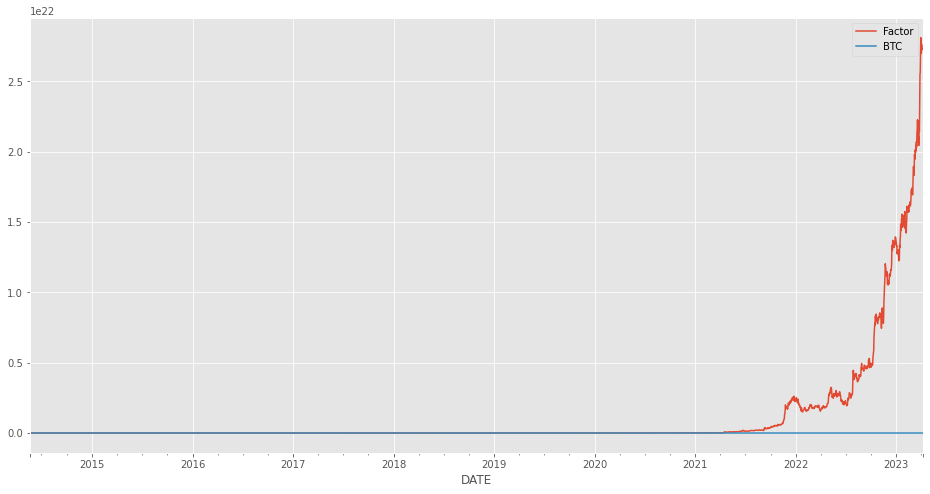

In [214]:
portfolio_analysis(momentum_factor, 10000)

### Rolling Alpha

<AxesSubplot: >

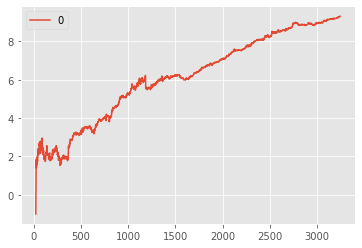

In [215]:
tvals_rolling = []
for i in range(len(momentum_factor)):
    reg_df = pd.DataFrame(momentum_factor[:i+1], columns = ['ret'])
    Y = reg_df['ret']
    res = smf.ols('Y ~ 1', data=reg_df).fit()
    tvals_rolling.append(res.tvalues[0])

rolling_alpha = pd.DataFrame(tvals_rolling)
rolling_alpha.plot()

### Slices

In [216]:
# Alpha t-stat for random slices of the timeperiod
tvals_slices = []

for i in range(100):
    """With many slices"""
    mom_slices = compute_mom_returns(log_ret_df, restricted_date_cap_df, n_universe=20, n_stocks=3, estimation_window=7, 
    holding_period=7, long_short='LS', attention=rolling_attention, random_start_date=False, random_slice=True, 
    going_neutral=False, miss_allocation=False)[1]

    reg_df_slices = pd.DataFrame(mom_slices, columns = ['ret'])

    Y = reg_df_slices['ret']
    try:
        res = smf.ols('Y ~ 1', data=reg_df_slices).fit()
        tvals_slices.append(res.tvalues[0])
    except: 
        continue

Sample Window goes from 2021-03-16 00:00:00 to 2022-04-02 00:00:00
Sample Window goes from 2021-07-21 00:00:00 to 2022-04-16 00:00:00
Sample Window goes from 2015-04-14 00:00:00 to 2021-10-22 00:00:00
Sample Window goes from 2017-02-10 00:00:00 to 2020-05-22 00:00:00
Sample Window goes from 2022-09-06 00:00:00 to 2022-10-06 00:00:00
Sample Window goes from 2023-03-08 00:00:00 to 2023-03-28 00:00:00
Sample Window goes from 2018-09-01 00:00:00 to 2022-04-05 00:00:00
Sample Window goes from 2015-08-10 00:00:00 to 2019-05-03 00:00:00
Sample Window goes from 2017-08-04 00:00:00 to 2023-03-15 00:00:00
Sample Window goes from 2016-11-01 00:00:00 to 2018-06-07 00:00:00
Sample Window goes from 2016-07-25 00:00:00 to 2023-03-13 00:00:00
Sample Window goes from 2016-07-03 00:00:00 to 2018-02-08 00:00:00
Sample Window goes from 2021-01-10 00:00:00 to 2021-05-11 00:00:00
Sample Window goes from 2018-11-09 00:00:00 to 2021-03-05 00:00:00
Sample Window goes from 2022-10-20 00:00:00 to 2023-03-23 00:0

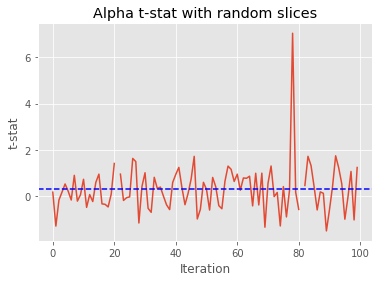

In [217]:
slices_tstats = pd.DataFrame(tvals_slices)

plt.style.use('ggplot')
# Plotting the data
plt.plot(slices_tstats.index, slices_tstats.iloc[:, 0])

plt.axhline(slices_tstats.iloc[:, 0].mean(), color='blue', linestyle='--', label='Mean')

# Set axis labels and title
plt.xlabel('Iteration')
plt.ylabel('t-stat')
plt.title('Alpha t-stat with random slices')

# Display the plot
plt.show()

### Rebalancing Periodicity

In [218]:
reb = [7, 14, 21, 28, 35, 42, 49, 56]
rebalancing_df = pd.DataFrame(index=reb, columns=reb)

for i in reb:
    for j in reb:
        reg_df_reb = compute_mom_returns(log_ret_df, restricted_date_cap_df, n_universe=20, n_stocks=3, estimation_window=i, 
        holding_period=j, long_short='LS', attention=rolling_attention, random_start_date=False, random_slice=False, 
        going_neutral=False, miss_allocation=False)[1]

        Y = reg_df_reb
        res = smf.ols('Y ~ 1', data=reg_df_reb).fit()
        rebalancing_df.at[i, j] = res.tvalues[0]


Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:0

In [219]:
# rows = estimation size 
# columns = rebalancing periodicity
rebalancing_df

,7,14,21,28,35,42,49,56
7,7.505613,1.911086,2.177417,-0.033517,1.693113,-0.911913,1.27963,0.155371
14,9.829674,1.971591,1.780994,-0.616717,2.364727,-0.750014,0.894702,1.38946
21,9.306251,1.136946,1.499125,0.505749,1.265994,-1.176818,0.356713,1.061567
28,9.734474,1.802408,1.459073,1.419719,0.098134,-1.187173,-0.122387,1.128692
35,8.142024,1.215176,0.215735,-0.111066,0.624847,-0.480604,-0.077317,0.415699
42,7.841375,1.295934,0.370678,-0.131594,1.301669,-0.427562,1.00245,0.516969
49,7.902765,0.99212,1.222977,0.012912,2.23831,-1.242936,0.813333,0.362762
56,7.99867,0.440992,1.484003,0.195371,1.294531,-1.602653,0.712881,2.53111


We get a similar conclusion to the literature that there seems to be strong reversal after the one week holding period

### Universe and stock picked interaction

In [220]:
### Establish some robustness tests on the basis of number of stocks in universe vs number of picked stocks maximum 

universe_ls_df = pd.DataFrame(index=[i for i in range(10,41)], columns=[j for j in range(1,5)])

def run_robustness():
    for i in range(10, 40):
        for j in range(1, 10):
            momentum_weights, momentum_factor = compute_mom_returns(log_ret_df, restricted_date_cap_df, n_universe=i, n_stocks=j, estimation_window=7, holding_period=7, long_short=None, attention=rolling_attention)

            reg_df = pd.DataFrame(momentum_factor, columns = ['ret'])

            Y = reg_df['ret']
            res = smf.ols('Y ~ 1', data=reg_df).fit()
            universe_ls_df.at[i, j] = res.tvalues[0]

run_robustness()

universe_ls_df = universe_ls_df.iloc[:-1, :-1]


Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:00:00
Sample Window goes from 2014-05-21 00:00:00 to 2023-04-08 00:0

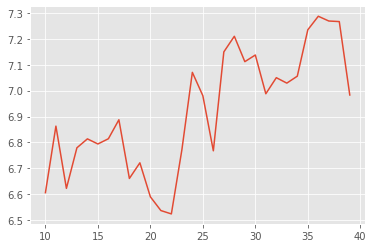

In [221]:
plt.plot(universe_ls_df.mean(axis=1))

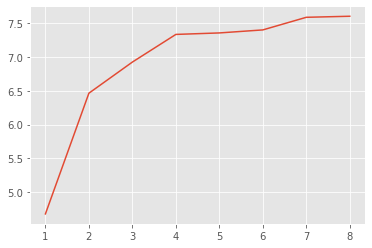

In [222]:
plt.plot(universe_ls_df.mean(axis=0))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


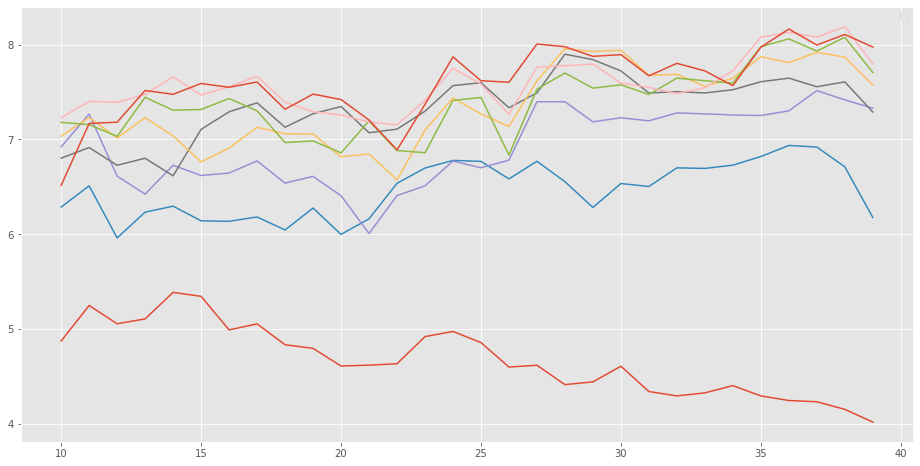

In [223]:
# Rows: Number of stocks in the universe 
# Columns: Number of stocks in LONG portfolio
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.plot(universe_ls_df)
plt.legend()